In [7]:
import pandas as pd
import numpy as np
import re

# Expanded relevant columns for ligand–protein binding prediction
usecols = [
    # Ligand identifiers
    "Ligand SMILES", "Ligand InChI", "Ligand InChI Key", "BindingDB Ligand Name",

    # Protein identifiers & sequences
    "Target Name",
    "UniProt (SwissProt) Primary ID of Target Chain 1",
    "BindingDB Target Chain Sequence 1",

    # Structure info
    "PDB ID(s) of Target Chain 1",
    "PDB ID(s) for Ligand-Target Complex",

    # Binding measurements
    "Ki (nM)", "Kd (nM)", "IC50 (nM)", "EC50 (nM)",

    # Kinetics
    "kon (M-1-s-1)", "koff (s-1)",

    # Experimental conditions
    "pH", "Temp (C)"
]

# Read dataset (strings to preserve raw formatting for cleaning)
df = pd.read_csv(
    "BindingDB_All.tsv",
    sep="\t",
    usecols=usecols,
    dtype=str,
    low_memory=False,
    nrows=500000  # limit for testing; remove for full dataset
)

# Keep rows with at least one measurement
df = df.dropna(subset=["Ki (nM)", "Kd (nM)", "IC50 (nM)", "EC50 (nM)"], how="all")

# Pick first non-null measurement
df["affinity_raw"] = (
    df["Ki (nM)"].fillna(df["Kd (nM)"])
    .fillna(df["IC50 (nM)"])
    .fillna(df["EC50 (nM)"])
)

# Extract numeric values
def extract_num(x):
    if pd.isna(x):
        return np.nan
    m = re.search(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', str(x))
    return float(m.group()) if m else np.nan

df["affinity_nM"] = df["affinity_raw"].map(extract_num)

# Keep only valid positive numeric affinities
df = df.dropna(subset=["affinity_nM"])
df = df[df["affinity_nM"] > 0]

# Convert to pAffinity (nM -> M)
df["pAff"] = -np.log10(df["affinity_nM"] * 1e-9)
# df["is_strong"] = (df["pAff"] >= 7.0).astype(int)

# Save cleaned dataset
df.to_csv("bindingdb_cleaned_test1000.csv", index=False)

# Preview
print(df.head(10))
print("Rows kept:", len(df))


                                       Ligand SMILES  \
0  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...   
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...   
2  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...   
3  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...   
4  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...   
5  CCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](...   
6  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CCC2)C(...   
7  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...   
8  CCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](...   
9  CC(C)=CCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@...   

                                        Ligand InChI  \
0  InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...   
1  InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...   
2  InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...   
3  InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...   
4  InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...   
5  InChI=1S/C27H36N2O3/c1-2-3-16-28-23(17-20-10

Epochs:   3%|▎         | 1/30 [01:11<34:31, 71.44s/epoch]

Epoch 1/30  train_loss(z)=0.7540  |  val_RMSE=1.1498  MAE=0.8941  R2=0.5327


Epochs:   7%|▋         | 2/30 [02:23<33:26, 71.67s/epoch]

Epoch 2/30  train_loss(z)=0.4558  |  val_RMSE=1.1265  MAE=0.8849  R2=0.5514


Epochs:  10%|█         | 3/30 [03:35<32:17, 71.75s/epoch]

Epoch 3/30  train_loss(z)=0.4085  |  val_RMSE=1.0320  MAE=0.7923  R2=0.6236


Epochs:  13%|█▎        | 4/30 [04:46<31:04, 71.71s/epoch]

Epoch 4/30  train_loss(z)=0.3725  |  val_RMSE=0.9829  MAE=0.7580  R2=0.6586


Epochs:  17%|█▋        | 5/30 [05:58<29:50, 71.64s/epoch]

Epoch 5/30  train_loss(z)=0.3438  |  val_RMSE=0.9867  MAE=0.7822  R2=0.6559


Epochs:  20%|██        | 6/30 [07:09<28:39, 71.63s/epoch]

Epoch 6/30  train_loss(z)=0.3234  |  val_RMSE=0.9572  MAE=0.7357  R2=0.6761


Epochs:  23%|██▎       | 7/30 [08:21<27:26, 71.59s/epoch]

Epoch 7/30  train_loss(z)=0.3070  |  val_RMSE=0.9276  MAE=0.7177  R2=0.6959


Epochs:  27%|██▋       | 8/30 [09:32<26:13, 71.54s/epoch]

Epoch 8/30  train_loss(z)=0.2934  |  val_RMSE=0.8938  MAE=0.6856  R2=0.7176


Epochs:  30%|███       | 9/30 [10:44<25:01, 71.51s/epoch]

Epoch 9/30  train_loss(z)=0.2803  |  val_RMSE=0.8842  MAE=0.6773  R2=0.7236


Epochs:  33%|███▎      | 10/30 [11:55<23:49, 71.48s/epoch]

Epoch 10/30  train_loss(z)=0.2695  |  val_RMSE=0.8679  MAE=0.6582  R2=0.7337


Epochs:  37%|███▋      | 11/30 [13:07<22:38, 71.48s/epoch]

Epoch 11/30  train_loss(z)=0.2587  |  val_RMSE=0.8426  MAE=0.6288  R2=0.7491


Epochs:  40%|████      | 12/30 [14:18<21:27, 71.53s/epoch]

Epoch 12/30  train_loss(z)=0.2494  |  val_RMSE=0.8322  MAE=0.6309  R2=0.7552


Epochs:  43%|████▎     | 13/30 [15:30<20:16, 71.58s/epoch]

Epoch 13/30  train_loss(z)=0.2388  |  val_RMSE=0.8326  MAE=0.6308  R2=0.7550


Epochs:  47%|████▋     | 14/30 [16:42<19:05, 71.59s/epoch]

Epoch 14/30  train_loss(z)=0.2307  |  val_RMSE=0.8092  MAE=0.5990  R2=0.7685


Epochs:  50%|█████     | 15/30 [17:53<17:53, 71.59s/epoch]

Epoch 15/30  train_loss(z)=0.2221  |  val_RMSE=0.7941  MAE=0.5901  R2=0.7771


Epochs:  53%|█████▎    | 16/30 [19:05<16:42, 71.64s/epoch]

Epoch 16/30  train_loss(z)=0.2140  |  val_RMSE=0.8004  MAE=0.6088  R2=0.7736


Epochs:  63%|██████▎   | 19/30 [22:40<13:07, 71.60s/epoch]

Epoch 19/30  train_loss(z)=0.1920  |  val_RMSE=0.7618  MAE=0.5673  R2=0.7949


Epochs:  67%|██████▋   | 20/30 [23:51<11:55, 71.56s/epoch]

Epoch 20/30  train_loss(z)=0.1864  |  val_RMSE=0.7651  MAE=0.5760  R2=0.7931


Epochs:  70%|███████   | 21/30 [25:03<10:44, 71.57s/epoch]

Epoch 21/30  train_loss(z)=0.1797  |  val_RMSE=0.7599  MAE=0.5714  R2=0.7959


Epochs:  73%|███████▎  | 22/30 [26:14<09:32, 71.62s/epoch]

Epoch 22/30  train_loss(z)=0.1743  |  val_RMSE=0.7506  MAE=0.5611  R2=0.8009


Epochs:  77%|███████▋  | 23/30 [27:26<08:21, 71.64s/epoch]

Epoch 23/30  train_loss(z)=0.1692  |  val_RMSE=0.7391  MAE=0.5448  R2=0.8069


Epochs:  80%|████████  | 24/30 [28:38<07:09, 71.60s/epoch]

Epoch 24/30  train_loss(z)=0.1644  |  val_RMSE=0.7398  MAE=0.5472  R2=0.8065


Epochs:  83%|████████▎ | 25/30 [29:49<05:58, 71.63s/epoch]

Epoch 25/30  train_loss(z)=0.1605  |  val_RMSE=0.7332  MAE=0.5400  R2=0.8100


Epochs:  87%|████████▋ | 26/30 [31:01<04:46, 71.58s/epoch]

Epoch 26/30  train_loss(z)=0.1566  |  val_RMSE=0.7296  MAE=0.5354  R2=0.8118


Epochs:  90%|█████████ | 27/30 [32:12<03:34, 71.57s/epoch]

Epoch 27/30  train_loss(z)=0.1545  |  val_RMSE=0.7295  MAE=0.5371  R2=0.8119


Epochs:  93%|█████████▎| 28/30 [33:24<02:23, 71.61s/epoch]

Epoch 28/30  train_loss(z)=0.1520  |  val_RMSE=0.7280  MAE=0.5353  R2=0.8127


Epochs:  97%|█████████▋| 29/30 [34:36<01:11, 71.62s/epoch]

Epoch 29/30  train_loss(z)=0.1503  |  val_RMSE=0.7276  MAE=0.5350  R2=0.8129


Epochs: 100%|██████████| 30/30 [35:47<00:00, 71.59s/epoch]

Epoch 30/30  train_loss(z)=0.1498  |  val_RMSE=0.7283  MAE=0.5363  R2=0.8125



/tmpdata/ipykernel_49968/1076489962.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(best_path, map_location=device)



TEST  RMSE=0.7303  MAE=0.5375  R2=0.8108
Saved: runs/jupyter_demo/best_model#30.pt


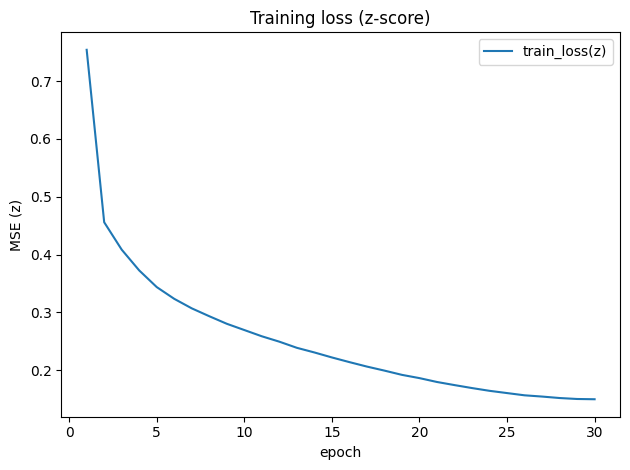

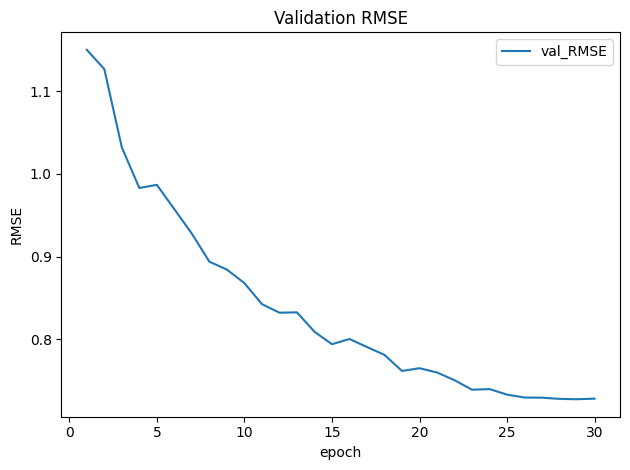

In [3]:
# %% [markdown]
# DeepDTA-style regression in one cell (SMILES + protein sequence -> pAff)
# Requires: pip install torch pandas numpy scikit-learn tqdm matplotlib

# %%
# CONFIG — adjust as needed
CONFIG = {
    "path": "bindingdb_cleaned_full.csv",   # CSV or TSV; must have: Ligand SMILES, BindingDB Target Chain Sequence 1, pAff
    "outdir": "runs/jupyter_demo",
    "epochs": 30,            # increased to 30
    "batch_size": 512,
    "lr": 1e-3,
    "max_len_smi": 200,
    "max_len_prot": 1000,
    "val_size": 0.1,
    "test_size": 0.1,
    "seed": 42,
    "limit_rows": 0,         # set >0 to subsample for quick tests
    "num_workers": 4,        # set 0 on Windows or if you hit DataLoader issues
}

# %%
import os, math, json, random, re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm, trange
import matplotlib.pyplot as plt

# ---- helpers ----
def set_seed(seed):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)

def detect_sep(path): return "\t" if path.lower().endswith(".tsv") else ","

AMINO_ACIDS = list("ACDEFGHIKLMNPQRSTVWY")  # 20 canonical
SMILES_CHARS = list("#%()+-./0123456789=@ABCFHILMNOPRSTVXZ[\\]acegilnoprstuy")

def build_vocab(chars, add_pad=True, add_unk=True):
    vocab, i = {}, 0
    if add_pad: vocab["<pad>"] = i; i += 1
    if add_unk: vocab["<unk>"] = i; i += 1
    for c in chars:
        if c not in vocab:
            vocab[c] = i; i += 1
    return vocab

SMI_VOCAB = build_vocab(SMILES_CHARS)
PROT_VOCAB = build_vocab(AMINO_ACIDS)

def encode(text, vocab, max_len):
    s = str(text)
    ids = [vocab.get(ch, vocab["<unk>"]) for ch in s[:max_len]]
    pad_id = vocab["<pad>"]
    if len(ids) < max_len:
        ids += [pad_id] * (max_len - len(ids))
    return np.array(ids, dtype=np.int64)

# ---- dataset ----
class AffinityDataset(Dataset):
    def __init__(self, df, max_len_smi=200, max_len_prot=1000, y_mean=None, y_std=None, zscore=True):
        self.smi = df["Ligand SMILES"].astype(str).values
        self.prot = df["BindingDB Target Chain Sequence 1"].astype(str).values
        self.y = df["pAff"].astype(float).values
        self.max_len_smi, self.max_len_prot = max_len_smi, max_len_prot
        self.zscore = zscore
        if zscore:
            self.y_mean = self.y.mean() if y_mean is None else y_mean
            self.y_std  = (self.y.std() + 1e-8) if y_std is None else y_std
            self.yz = (self.y - self.y_mean) / self.y_std
        else:
            self.y_mean = self.y_std = None
            self.yz = self.y

    def __len__(self): return len(self.y)
    def __getitem__(self, idx):
        xs = torch.from_numpy(encode(self.smi[idx], SMI_VOCAB, self.max_len_smi))
        xp = torch.from_numpy(encode(self.prot[idx], PROT_VOCAB, self.max_len_prot))
        y  = torch.tensor([self.yz[idx]], dtype=torch.float32)
        return xs, xp, y

# ---- model ----
class CNNEncoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, channels, kernels, dropout=0.1):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        convs = []
        in_ch = emb_dim
        for k, ch in zip(kernels, channels):
            convs.append(nn.Sequential(
                nn.Conv1d(in_ch, ch, kernel_size=k, padding=k//2),
                nn.ReLU(),
                nn.BatchNorm1d(ch)
            ))
            in_ch = ch
        self.convs = nn.ModuleList(convs)
        self.drop = nn.Dropout(dropout)

    def forward(self, x):           # (B, L)
        x = self.emb(x)             # (B, L, E)
        x = x.transpose(1, 2)       # (B, E, L)
        for block in self.convs:
            x = block(x)
        x = torch.max(x, dim=2).values   # global max pool -> (B, C)
        return self.drop(x)

class DeepDTARegressor(nn.Module):
    def __init__(self,
                 smi_vocab_size, prot_vocab_size,
                 emb_smi=64, emb_prot=64,
                 smi_channels=(128,128,128), prot_channels=(256,256,256),
                 smi_kernels=(5,7,11), prot_kernels=(7,11,15),
                 hidden=512, dropout=0.2):
        super().__init__()
        self.smi_enc  = CNNEncoder(smi_vocab_size,  emb_smi,  smi_channels,  smi_kernels,  dropout)
        self.prot_enc = CNNEncoder(prot_vocab_size, emb_prot, prot_channels, prot_kernels, dropout)
        fused = smi_channels[-1] + prot_channels[-1]
        self.mlp = nn.Sequential(
            nn.Linear(fused, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, 1)
        )
    def forward(self, xs, xp):
        hs = self.smi_enc(xs)
        hp = self.prot_enc(xp)
        return self.mlp(torch.cat([hs, hp], dim=1))

# ---- robust stratified split ----
def stratify_bins(y, max_bins=12, min_count=2):
    y = pd.Series(y).astype(float)
    for b in range(max_bins, 1, -1):
        q = pd.qcut(y, q=b, labels=False, duplicates="drop")
        vc = q.value_counts()
        if (vc >= min_count).all() and len(vc) >= 2:
            return q.values
    return None

def stratified_split_by_value(df, ycol, test_size, random_state):
    ybins = stratify_bins(df[ycol], max_bins=12, min_count=2)
    if ybins is None:
        return train_test_split(df, test_size=test_size, random_state=random_state, shuffle=True, stratify=None)
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    idx_train, idx_test = next(sss.split(df, ybins))
    return df.iloc[idx_train].reset_index(drop=True), df.iloc[idx_test].reset_index(drop=True)

# ---- eval ----
def evaluate(model, loader, device, y_mean, y_std, zscore=True):
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for xs, xp, y in loader:
            xs, xp, y = xs.to(device), xp.to(device), y.to(device)
            out = model(xs, xp)
            preds.append(out.cpu().numpy())
            trues.append(y.cpu().numpy())
    preds = np.concatenate(preds, 0).squeeze()
    trues = np.concatenate(trues, 0).squeeze()
    if zscore:
        preds = preds * y_std + y_mean
        trues = trues * y_std + y_mean
    rmse = math.sqrt(mean_squared_error(trues, preds))
    mae  = mean_absolute_error(trues, preds)
    r2   = r2_score(trues, preds)
    return rmse, mae, r2

# ---- main ----
os.makedirs(CONFIG["outdir"], exist_ok=True)
set_seed(CONFIG["seed"])

sep = detect_sep(CONFIG["path"])
df = pd.read_csv(CONFIG["path"], sep=sep, low_memory=False)

needed = {"Ligand SMILES", "BindingDB Target Chain Sequence 1", "pAff"}
miss = needed - set(df.columns)
if miss:
    raise ValueError(f"Missing required columns: {miss}")

df = df.dropna(subset=["Ligand SMILES","BindingDB Target Chain Sequence 1","pAff"]).copy()
df = df[df["pAff"].astype(str).str.match(r"^-?\d+(\.\d+)?$")]
df["pAff"] = df["pAff"].astype(float)

if CONFIG["limit_rows"] and len(df) > CONFIG["limit_rows"]:
    df = df.sample(CONFIG["limit_rows"], random_state=CONFIG["seed"]).reset_index(drop=True)

df_train, df_tmp = stratified_split_by_value(
    df, ycol="pAff", test_size=CONFIG["val_size"] + CONFIG["test_size"], random_state=CONFIG["seed"]
)
rel_test = CONFIG["test_size"] / (CONFIG["val_size"] + CONFIG["test_size"] + 1e-8)
df_val, df_test = stratified_split_by_value(
    df_tmp, ycol="pAff", test_size=rel_test, random_state=CONFIG["seed"]
)

y_mean, y_std = df_train["pAff"].mean(), df_train["pAff"].std() + 1e-8
train_ds = AffinityDataset(df_train, CONFIG["max_len_smi"], CONFIG["max_len_prot"], y_mean, y_std, zscore=True)
val_ds   = AffinityDataset(df_val,   CONFIG["max_len_smi"], CONFIG["max_len_prot"], y_mean, y_std, zscore=True)
test_ds  = AffinityDataset(df_test,  CONFIG["max_len_smi"], CONFIG["max_len_prot"], y_mean, y_std, zscore=True)

pin = torch.cuda.is_available()
workers = CONFIG["num_workers"]
train_loader = DataLoader(train_ds, batch_size=CONFIG["batch_size"], shuffle=True,  num_workers=workers, pin_memory=pin)
val_loader   = DataLoader(val_ds,   batch_size=CONFIG["batch_size"], shuffle=False, num_workers=workers, pin_memory=pin)
test_loader  = DataLoader(test_ds,  batch_size=CONFIG["batch_size"], shuffle=False, num_workers=workers, pin_memory=pin)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepDTARegressor(
    smi_vocab_size=len(SMI_VOCAB),
    prot_vocab_size=len(PROT_VOCAB),
    emb_smi=64, emb_prot=64,
    smi_channels=(128,128,128),
    prot_channels=(256,256,256),
    smi_kernels=(5,7,11),
    prot_kernels=(7,11,15),
    hidden=512, dropout=0.2
).to(device)

opt = torch.optim.AdamW(model.parameters(), lr=CONFIG["lr"], weight_decay=1e-4)
sched = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=max(1, CONFIG["epochs"]))
loss_fn = nn.MSELoss()

best_val = float("inf")
best_path = os.path.join(CONFIG["outdir"], "best_model#30.pt")

from tqdm.auto import tqdm

history = {
    "epoch": [],
    "train_loss_z": [],
    "val_rmse": [],
    "val_mae": [],
    "val_r2": []
}

for epoch in tqdm(range(1, CONFIG["epochs"]+1), desc="Epochs", unit="epoch"):
    model.train()
    running = 0.0
    for xs, xp, y in train_loader:
        xs, xp, y = xs.to(device), xp.to(device), y.to(device)
        opt.zero_grad()
        pred = model(xs, xp)
        loss = loss_fn(pred, y)
        loss.backward()
        opt.step()
        running += loss.item() * xs.size(0)
    sched.step()

    train_loss = running / len(train_ds)
    val_rmse, val_mae, val_r2 = evaluate(model, val_loader, device, y_mean, y_std, zscore=True)
    print(f"Epoch {epoch}/{CONFIG['epochs']}  "
          f"train_loss(z)={train_loss:.4f}  |  val_RMSE={val_rmse:.4f}  "
          f"MAE={val_mae:.4f}  R2={val_r2:.4f}")

    history["epoch"].append(epoch)
    history["train_loss_z"].append(train_loss)
    history["val_rmse"].append(val_rmse)
    history["val_mae"].append(val_mae)
    history["val_r2"].append(val_r2)

    if val_rmse < best_val:
        best_val = val_rmse
        torch.save({
            "model_state": model.state_dict(),
            "y_mean": y_mean, "y_std": y_std,
            "smi_vocab": SMI_VOCAB, "prot_vocab": PROT_VOCAB,
            "config": CONFIG
        }, best_path)


# load best & test
ckpt = torch.load(best_path, map_location=device)
model.load_state_dict(ckpt["model_state"])
test_rmse, test_mae, test_r2 = evaluate(model, test_loader, device, ckpt["y_mean"], ckpt["y_std"], zscore=True)
print(f"\nTEST  RMSE={test_rmse:.4f}  MAE={test_mae:.4f}  R2={test_r2:.4f}")

# persist metrics and history
os.makedirs(CONFIG["outdir"], exist_ok=True)
with open(os.path.join(CONFIG["outdir"], "metrics.json"), "w") as f:
    json.dump({
        "val_best_rmse": best_val,
        "test_rmse": test_rmse,
        "test_mae": test_mae,
        "test_r2": test_r2,
        "n_train": len(df_train), "n_val": len(df_val), "n_test": len(df_test)
    }, f, indent=2)

pd.DataFrame(history).to_csv(os.path.join(CONFIG["outdir"], "history.csv"), index=False)

# plots
plt.figure()
plt.plot(history["epoch"], history["train_loss_z"], label="train_loss(z)")
plt.xlabel("epoch"); plt.ylabel("MSE (z)"); plt.title("Training loss (z-score)")
plt.legend(); plt.tight_layout()
plt.savefig(os.path.join(CONFIG["outdir"], "train_loss_z.png"), dpi=150)

plt.figure()
plt.plot(history["epoch"], history["val_rmse"], label="val_RMSE")
plt.xlabel("epoch"); plt.ylabel("RMSE"); plt.title("Validation RMSE")
plt.legend(); plt.tight_layout()
plt.savefig(os.path.join(CONFIG["outdir"], "val_rmse.png"), dpi=150)

print("Saved:", best_path)
